**Softmax Regression**

**Model code**

In [ ]:
class SoftmaxRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear  = nn.Linear(4, 3)
    def forward(self, x):
        return self.linear(x)

**Training**

In [ ]:
x_train = torch.FloatTensor([[6.3, 3.3, 6.0, 2.5],
                             [5.8, 2.7, 5.1, 1.9],
                             [7.1, 3.0, 5.9, 2.1],
                             [5.1, 3.5, 1.4, 0.2],
                             [4.9, 3.0, 1.4, 0.2],
                             [4.7, 3.2, 1.3, 0.2],
                             [7.0, 3.2, 4.7, 1.4],
                             [6.4, 3.2, 4.5, 1.5],
                             [6.9, 3.1, 4.9, 1.5]])

y_train = torch.LongTensor([0,0,0,1,1,1,2,2,2])


model = SoftmaxRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
nb_epochs = 1000
for epoch in range(nb_epochs+1):

    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:

      correct_prediction = torch.argmax(prediction, 1) == y_train
      accuracy = correct_prediction.float().mean().item()
      print('Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(
          epoch, nb_epochs, cost.item(), accuracy*100
      ))

Epoch    0/1000 Cost: 1.348675 Accuracy: 33.33%
Epoch  100/1000 Cost: 0.252970 Accuracy: 100.00%
Epoch  200/1000 Cost: 0.148312 Accuracy: 100.00%
Epoch  300/1000 Cost: 0.109800 Accuracy: 100.00%
Epoch  400/1000 Cost: 0.087248 Accuracy: 100.00%
Epoch  500/1000 Cost: 0.072407 Accuracy: 100.00%
Epoch  600/1000 Cost: 0.061892 Accuracy: 100.00%
Epoch  700/1000 Cost: 0.054049 Accuracy: 100.00%
Epoch  800/1000 Cost: 0.047974 Accuracy: 100.00%
Epoch  900/1000 Cost: 0.043129 Accuracy: 100.00%
Epoch 1000/1000 Cost: 0.039175 Accuracy: 100.00%


**Testing**

In [ ]:
test_data = torch.FloatTensor([[6.3, 2.9, 5.6, 1.8],
                               [6.5, 3.0, 5.8, 2.2],
                               [4.6, 3.1, 1.5, 0.2],
                               [5.0, 3.6, 1.4, 0.2],
                               [5.5, 2.3, 4.0, 1.3],
                               [6.5, 2.8, 4.6, 1.5]])
# Class 0, 1, 2 두개씩 포함하고 있는 테스트 데이터셋
prediction = F.softmax( model(test_data), dim = 1  )

print (prediction)

tensor([[9.4463e-01, 2.4999e-05, 5.5345e-02],
        [9.8244e-01, 5.3047e-06, 1.7551e-02],
        [1.1995e-07, 9.7550e-01, 2.4497e-02],
        [3.1149e-09, 9.9333e-01, 6.6651e-03],
        [2.4387e-01, 6.5959e-03, 7.4953e-01],
        [1.1238e-01, 4.5474e-03, 8.8307e-01]], grad_fn=<SoftmaxBackward0>)


**Softmax Regression for MNIST dataset**

**Model code**

In [ ]:
class MNIST_SoftmaxRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)
    def forward(self, x):
        return self.linear(x)

**Training**

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

# hyperparameters

training_epochs = 15
batch_size = 100
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

#첫 다운로드 오류는 무시해도 됨 -> 데이터를 다운로드하는 도중 원래 제공하던 사이트에서 403 에러로 인해 다운로드에 실패했지만, 대체 URL로 Amazon S3에서 다운로드

# dataset loader

data_loader  = DataLoader(dataset=mnist_train,
                          batch_size=batch_size,
                          shuffle=True)

model = MNIST_SoftmaxRegression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for idx, (x_train, y_train) in enumerate(data_loader):

        x_train  = x_train.view(-1, 28*28 )

        prediction = model(x_train)
        cost = criterion(prediction, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 33516690.13it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1089977.09it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8929180.51it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2420344.15it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Epoch: 0001 cost = 0.533756435
Epoch: 0002 cost = 0.359071314
Epoch: 0003 cost = 0.330853909
Epoch: 0004 cost = 0.316269368
Epoch: 0005 cost = 0.306897253
Epoch: 0006 cost = 0.299754918
Epoch: 0007 cost = 0.295043975
Epoch: 0008 cost = 0.290703654
Epoch: 0009 cost = 0.287395447
Epoch: 0010 cost = 0.284370959
Epoch: 0011 cost = 0.281917304
Epoch: 0012 cost = 0.279720277
Epoch: 0013 cost = 0.277781814
Epoch: 0014 cost = 0.275830269
Epoch: 0015 cost = 0.274402380
Learning finished


In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.

    x_test = mnist_test.data.view(-1, 28*28).float()
    y_test = mnist_test.targets

    prediction = model(x_test)

    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8838000297546387


Label:  6
Prediction:  6


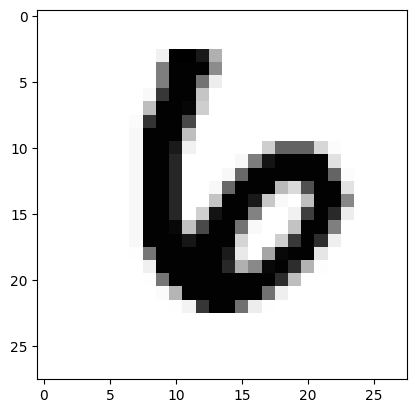

In [ ]:
with torch.no_grad():
    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    x_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float()
    y_single_data = mnist_test.targets[r:r + 1]

    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()